## $\text{Assignment - I}$
<br/>

### $\text{Problem 1.}$

$\text{First, we generate the random sample of size 1000.}$

In [36]:
sample = rnorm(1000,mean=0,sd=1)

$\text{(a) Suppose } X_{1},X_{2},...X_{n} \text{ are iid }N(\mu,\sigma^{2})$
$\text{For the method of moments, we have }\theta_{1} = \mu, \theta_{2} = \sigma^{2}, m_{1} = \bar{X}, m_{2} = \frac{1}{n} \sum X_{i}^{2}.$
$\text{Solving for } \bar{X} = \mu \text{ and } \frac{1}{n} \sum X_{i}^{2} = \theta^{2} + \sigma^{2},\text{ we get the following estimators:}$
$\bar{\mu} = \overline{X}, \overline{\sigma} = \frac{1}{n} \sum (X_{i}-\bar{X})^{2}$
<br/>
$\text{We use these estimators to evaluate unknown parameters }\mu, \sigma.$

In [37]:
# mean estimate
mean_mme = mean(sample)

# variance estimate
variance_mme = 0
for(i in 1:1000){
    variance_mme <- variance_mme + (mean_mme - sample[i])*(mean_mme - sample[i])
}
variance_mme <- variance_mme/1000

print(paste('Estimated Mean =',mean_mme))
print(paste('Estimated Variance =',variance_mme))

[1] "Estimated Mean = -0.0135899093780407"
[1] "Estimated Variance = 0.97170969813079"


$\text{(b) Log-Likelihood for a sample from the normal distribution can be written as:}$
$l(\theta|x_{1},.,..x_{n}) = \frac{-n}{2}\log{2\pi} - n\log{\sigma} - \sum_{i=1}^{n} \frac{(x_{i}-\mu)^{2}}{2\sigma^{2}}$
$\text{We create a negative version of the log-likelihood function and yield estimates upon}$ 
$\text{minimizing it.}$

In [38]:
loglikelihood <- function(vec){
    
    mu = vec[1]
    sd = vec[2]
    
    term_1 <- -1/(2*sd*sd)
    term_2 <- -500*log(2*pi)
    term_3 <- -1000*log(sd) 
    
    estimate <- 0
    for(i in 1:1000){
        estimate <- estimate + (sample[i]-mu)^2
    }
    estimate <- term_1*estimate + term_2 + term_3
    
    return(-estimate)
}

MLE = nlminb(start=c(-0.5, 0.5),objective=loglikelihood,hessian=T)
MLE

$par
[1] -0.01358991  0.98575336

$objective
[1] 1404.589

$convergence
[1] 0

$iterations
[1] 8

$evaluations
function gradient 
      12       24 

$message
[1] "relative convergence (4)"

$\text{As we can see, the function converges in 9 iterations to yield the following estimates:}$
$\mu = -0.0135, \sigma = 0.9875$

$\text{(c) We use the log likelihood function to plot various values of mean for variance = 1.}$

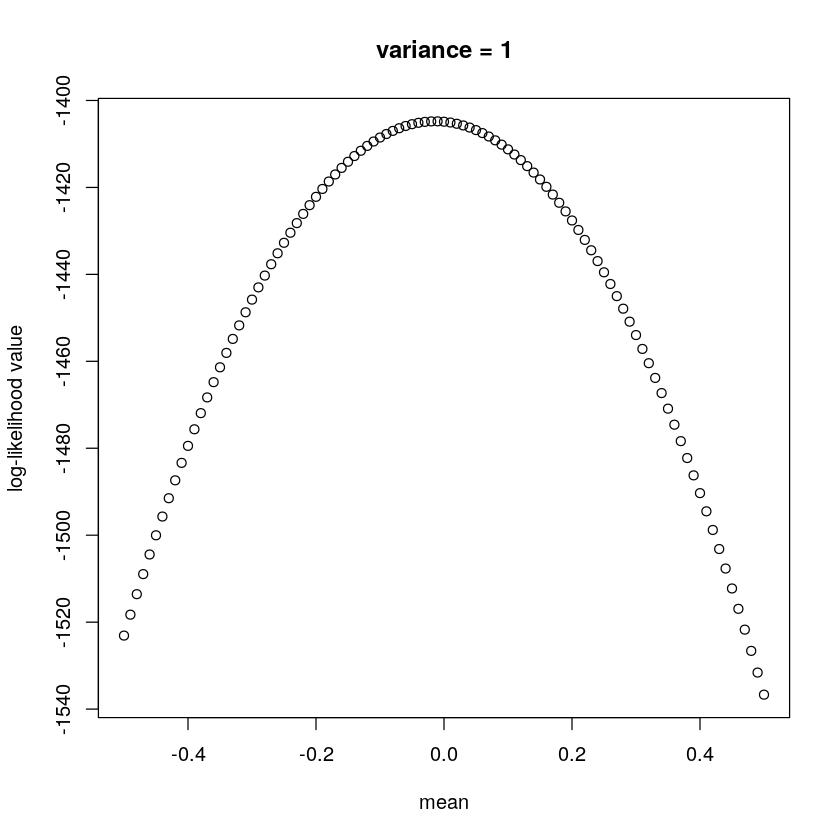

In [39]:
loglikelihood <- function(mu,sd){
    
    term_1 <- -1/(2*sd*sd)
    term_2 <- -500*log(2*pi)
    term_3 <- -1000*log(sd) 
    
    estimate <- 0
    for(i in 1:1000){
        estimate <- estimate + (sample[i]-mu)^2
    }
    estimate <- term_1*estimate + term_2 + term_3
    
    return(estimate)
}

mu_vec = seq(-0.5,0.5,by=0.01)
sd = 1
result = outer(mu_vec,sd,FUN=loglikelihood)
plot(mu_vec,result,xlab='mean',ylab='log-likelihood value',main='variance = 1')

$\text{(d) We define neighbourhoods of 0.5 along both }\mu = 0 \text{ and } \sigma = 1.$ $\text{We take discretization step } = 0.025 \text{ and draw a 3d plot for various values of }\mu,\sigma.$

In [40]:
# generate 0.5 neighbourhood along mu and sd
mu_vec = seq(-0.5,0.5,by=0.025)
sd_vec = seq(0.5,1.5,by=0.025)

# compute log likelihood for all points in the neighbourhood
result = outer(mu_vec,sd_vec,FUN=loglikelihood)

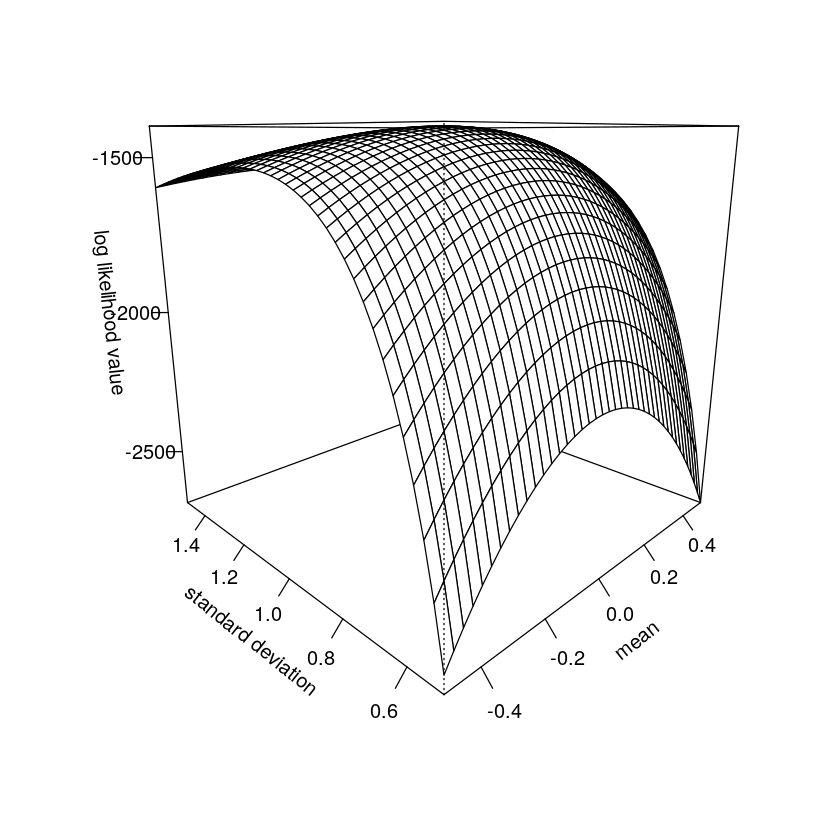

In [41]:
# plot graph for log likelihood
persp(mu_vec,sd_vec,result,ticktype='detailed',theta='-45',xlab='mean',ylab='standard deviation',zlab='log likelihood value')

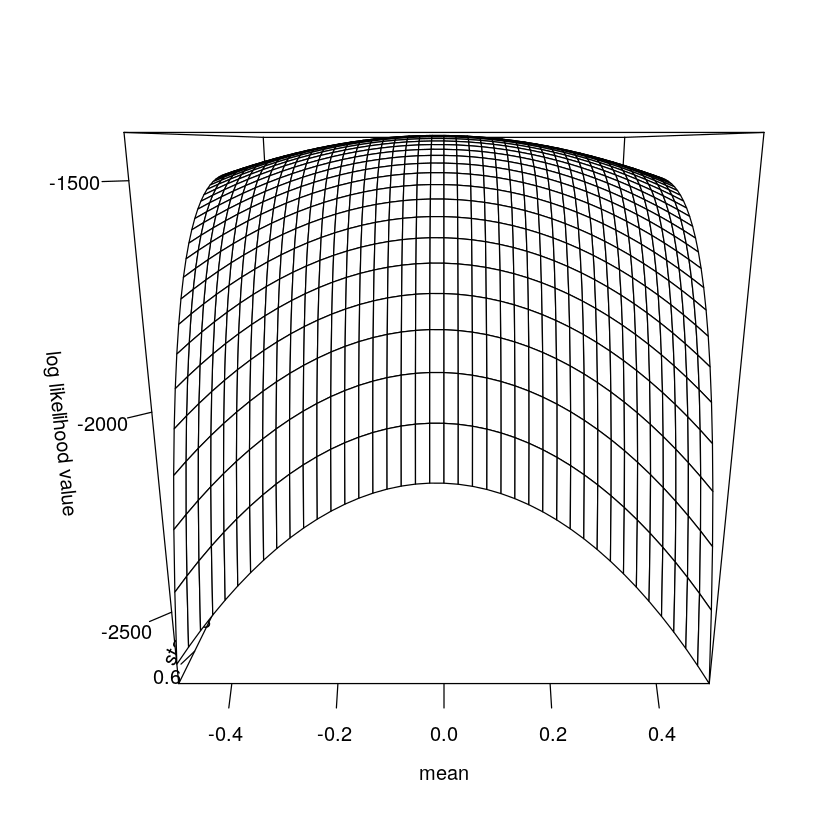

In [42]:
# To show d(Likelihood func)/d(mu) = 0 at mu = 0
persp(mu_vec,sd_vec,result,ticktype='detailed',theta='0',xlab='mean',ylab='standard deviation',zlab='log likelihood value')

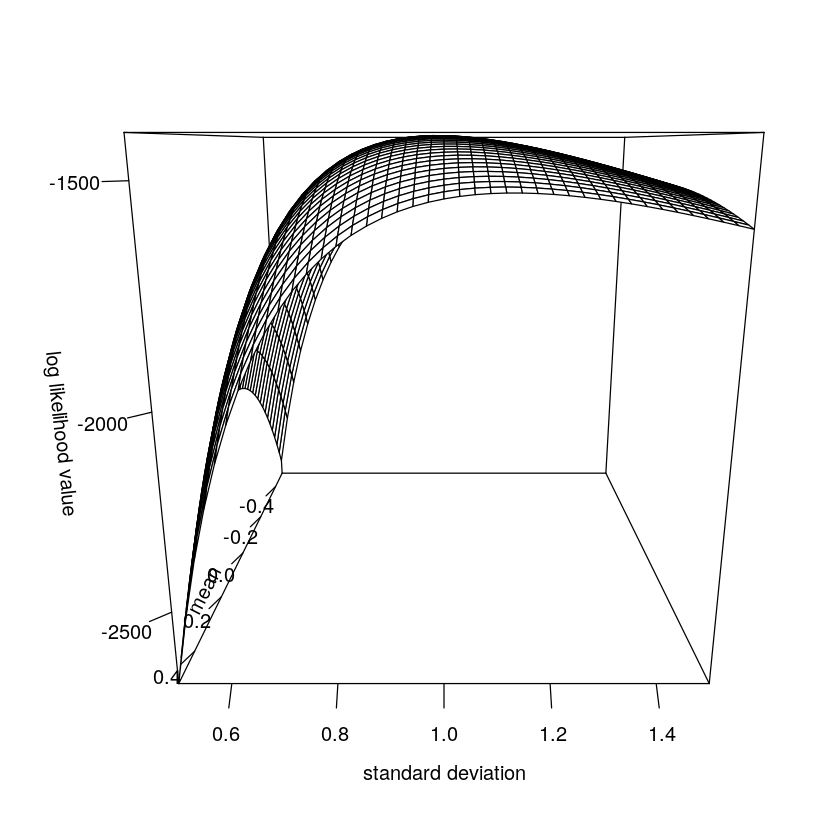

In [43]:
# To show d(Likelihood func)/d(sd) = 0 at sd = 1
persp(mu_vec,sd_vec,result,ticktype='detailed',theta='90',xlab='mean',ylab='standard deviation',zlab='log likelihood value')

$\text{Group}$
<br/>
### $\text{Ashwin Singh (2017222)}$
<br/>
$\text{Medha Sharma (2017247)}$
<br/>
$\text{Vaibhav Pulastya (2017271)}$ 